In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import os
from tqdm import tqdm

path = './processed'
dataset = 'SMAP'

In [3]:
# Importing the dataset from the pickle files to pandas dataframes
X_train = pd.read_pickle(os.path.join(path, dataset, dataset + '_train.pkl'))

X_test = pd.read_pickle(os.path.join(path, dataset, dataset + '_test.pkl'))
y_test  = pd.read_pickle(os.path.join(path, dataset, dataset + '_test_label.pkl'))

In [4]:
y_test = y_test.astype(int)

In [5]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([372921,  54696]))

In [6]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
count,135183.000000,135183.000000,135183.000000,135183.000000,135183.000000,135183.000000,135183.000000,135183.000000,135183.000000,135183.000000,...,135183.00000,135183.0,135183.000000,135183.000000,135183.000000,135183.000000,135183.000000,135183.000000,135183.000000,135183.000000
mean,-0.186839,0.027563,0.005356,0.021719,0.000259,0.128078,0.098008,0.001095,0.000370,0.000481,...,0.00003,0.0,0.020875,0.020602,0.010852,0.000089,0.028798,0.027208,0.000044,0.000015
std,0.788578,0.163717,0.072987,0.145764,0.016089,0.334178,0.297326,0.033070,0.019228,0.021923,...,0.00544,0.0,0.142968,0.142047,0.103606,0.009421,0.167239,0.162688,0.006662,0.003846
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.373494,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.664939,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


/storage/store/work/jyehya/anaconda/envs/benchopt/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/storage/store/work/jyehya/anaconda/envs/benchopt/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


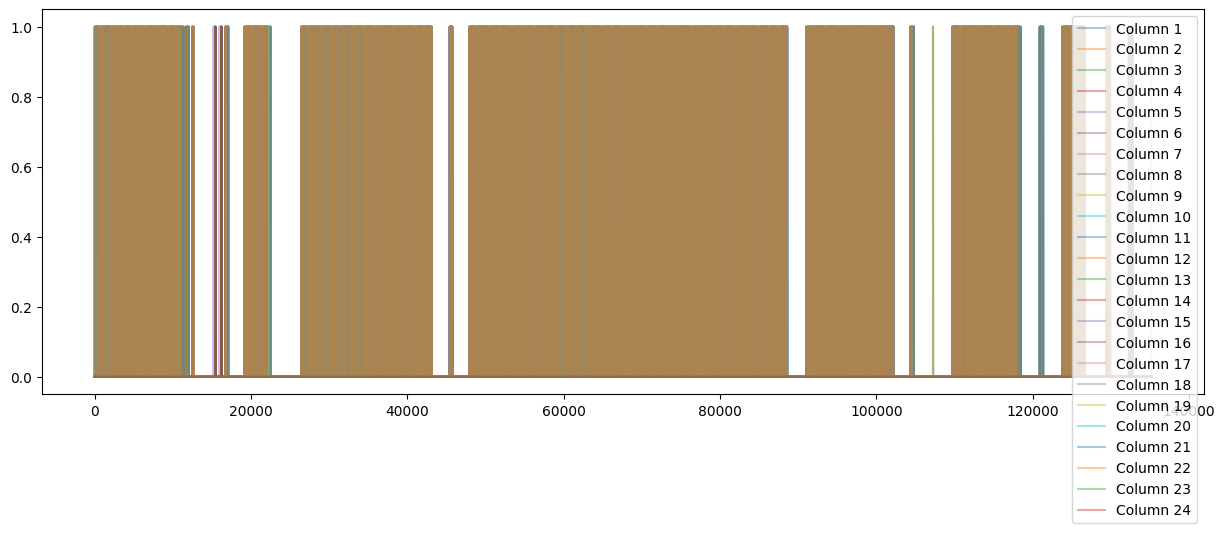

In [7]:
# Plotting the data
plt.figure(figsize=(15, 5))
# Plot every column except the first one
for i in range(1, X_train.shape[1]):
    plt.plot(X_train.iloc[:, i], label='Column ' + str(i), alpha=0.4)
plt.legend()


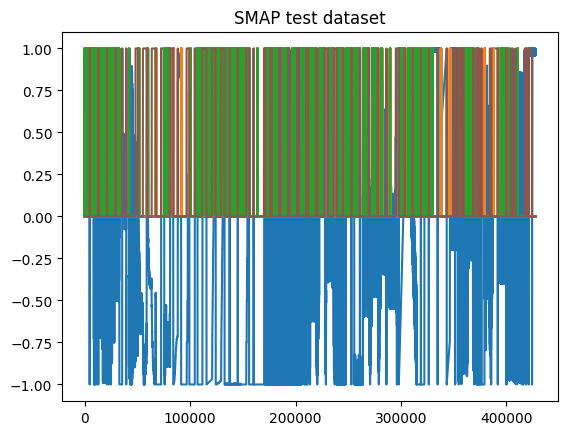

In [8]:
plt.plot(X_test)
plt.title('SMAP test dataset')
# add vertical lines where the anomalies are
anomalies = np.where(y_test == 1)[0]
plt.plot(y_test)

In [9]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [10]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
from sklearn.ensemble import IsolationForest

In [12]:
model = IsolationForest(contamination=0.01)
model.fit(X_train)

IsolationForest(contamination=0.01)

In [13]:
# Predicting the anomalies
y_pred = model.predict(X_test)


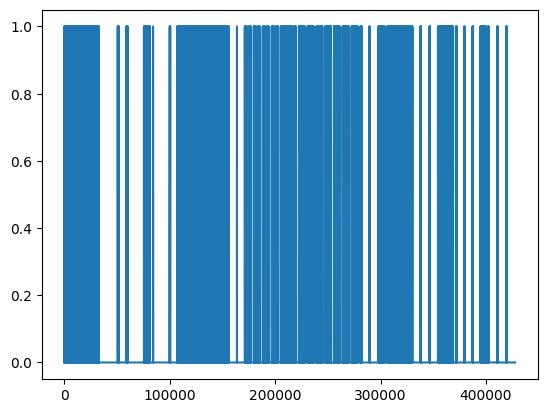

In [14]:
# Converting the predictions to 0s and 1s
y_pred = [1 if x == -1 else 0 for x in y_pred]

# Plotting the predictions
plt.plot(y_pred)

In [15]:
# comparing to gt
(y_pred == y_test).mean()

0.8671755332458719

In [16]:
np.unique(y_pred, return_counts=True)

(array([0, 1]), array([424927,   2690]))

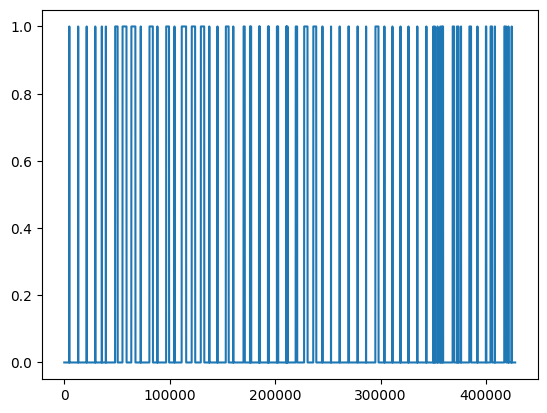

In [17]:
plt.plot(y_test)

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

p = precision_score(y_test, y_pred)
r = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print(f'Precision: {p:.2f}, Recall: {r:.2f}, F1: {f1:.2f}, Accuracy: {acc:.2f}')

Precision: 0.11, Recall: 0.01, F1: 0.01, Accuracy: 0.87


## Creating the dataset with windows (if there is 1 anomaly in a window, all the window has the label anomaly)
Then, because the windows will overlap, we can have a finer labeling but for now, window labeling.

In [19]:
X_train["ids"] = range(0, len(X_train))

In [20]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,ids
0,0.999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [21]:
windows = np.lib.stride_tricks.sliding_window_view(X_train, window_shape=(1000, X_train.shape[1]))

In [22]:
windows.shape

(134184, 1, 1000, 26)

In [23]:
X_train.shape

(135183, 26)

In [24]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,ids
0,0.999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [25]:
np.set_printoptions(suppress=True)

windows[::800].shape

(168, 1, 1000, 26)

In [26]:
134184 % (800)

584

In [27]:
window_overlap = 800
train_size = 0.8

In [28]:
# Create variable avec les windows 800 + train/test
rolls = windows[::window_overlap]

rolls_train = rolls[:int(train_size * len(rolls))]
rolls_test = rolls[int(train_size * len(rolls)):]

rolls.shape, rolls_train.shape, rolls_test.shape

((168, 1, 1000, 26), (134, 1, 1000, 26), (34, 1, 1000, 26))

## Isolation Forest sur les windows

In [29]:
from sklearn.ensemble import IsolationForest

In [30]:
model = IsolationForest(contamination=0.01)

# Train the model
for roll in tqdm(rolls_train):
    # print(roll.squeeze().shape)
    model.fit(roll.squeeze())


100%|██████████| 134/134 [00:42<00:00,  3.19it/s]


In [31]:
# Test
y_pred = []
for roll in tqdm(rolls_test):
    y_pred.append(model.predict(roll.squeeze()))
    
y_pred = np.array(y_pred)

100%|██████████| 34/34 [00:00<00:00, 114.49it/s]


In [32]:
y_pred[:, 0]

array([ 1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1])

In [33]:
y_train_pred = []
for roll in tqdm(rolls_train):
    y_train_pred.append(model.predict(roll.squeeze()))
    
y_train_pred = np.array(y_train_pred)

y_train_pred[:, 0]

100%|██████████| 134/134 [00:01<00:00, 120.35it/s]


array([-1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

# Now trying on MSL

In [34]:
path = './processed'
dataset = 'MSL'

# Importing the dataset from the pickle files to pandas dataframes
X_train = pd.read_pickle(os.path.join(path, dataset, dataset + '_train.pkl'))

X_test = pd.read_pickle(os.path.join(path, dataset, dataset + '_test.pkl'))
y_test  = pd.read_pickle(os.path.join(path, dataset, dataset + '_test_label.pkl'))


In [35]:
y_test = y_test.astype(int)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
count,58317.000000,58317.0,58317.000000,58317.000000,58317.0,58317.000000,58317.000000,58317.000000,58317.0,58317.000000,...,58317.000000,58317.000000,58317.000000,58317.000000,58317.000000,58317.0,58317.0,58317.0,58317.000000,58317.000000
mean,-0.088911,0.0,0.000017,0.000051,0.0,0.085807,0.000617,0.000497,0.0,0.000154,...,0.000120,0.000017,0.009140,0.000017,0.009483,0.0,0.0,0.0,0.000806,0.001217
std,0.904977,0.0,0.004141,0.007172,0.0,0.280081,0.024838,0.022294,0.0,0.012422,...,0.010955,0.004141,0.095165,0.004141,0.096917,0.0,0.0,0.0,0.028378,0.034872
min,-1.477217,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
25%,-1.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
50%,-0.451955,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
75%,0.960276,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
max,4.162651,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000


In [36]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)


In [37]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2.146646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.146646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.146646,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.151326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.163807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58312,0.333338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58313,0.333338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58314,0.333338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58315,0.333338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([65963,  7766]))

In [39]:
model = IsolationForest(contamination=0.01)
model.fit(X_train)

# Predicting the anomalies
y_pred = model.predict(X_test)

# Converting the predictions to 0s and 1s
y_pred = [1 if x == -1 else 0 for x in y_pred]



In [40]:
accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)

(0.883383743167546,
 0.08316633266533066,
 0.010687612670615503,
 0.01894112277498859)

# Now Trying on SMD

In [41]:
path = './processed'
dataset = 'SMD'
machine = "1-1"


# Importing the dataset from the pickle files to pandas dataframes
X_train = pd.read_pickle(os.path.join(path, dataset, "machine-" + machine + '_train.pkl'))

X_test = pd.read_pickle(os.path.join(path, dataset, "machine-" + machine + '_test.pkl'))
y_test = pd.read_pickle(os.path.join(path, dataset, "machine-" + machine + '_test_label.pkl'))

In [42]:
X_train

array([[0.032258, 0.039195, 0.027871, ..., 0.034747, 0.      , 0.      ],
       [0.043011, 0.048729, 0.033445, ..., 0.035833, 0.      , 0.      ],
       [0.043011, 0.034958, 0.03233 , ..., 0.033082, 0.      , 0.      ],
       ...,
       [0.086022, 0.065678, 0.073579, ..., 0.064934, 0.      , 0.      ],
       [0.086022, 0.056144, 0.068004, ..., 0.067178, 0.      , 0.      ],
       [0.075269, 0.081568, 0.072464, ..., 0.065079, 0.      , 0.      ]],
      dtype=float32)

In [50]:
def load_data(dataset:str, machine:str|list[str] = None) -> tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame]:
    """Loads the data from the pickle files and returns 
    the train, test and labels dataframes

    Args:
        dataset (str): dataset name (SMD, MSL, SMAP)
        machine (str, optional): _description_. machine number for SMD dataset. Defaults to None.
        format : machine-1-1
    """
    if dataset not in ['SMD', 'MSL', 'SMAP']:
        raise ValueError("Dataset name should be one of ['SMD', 'MSL', 'SMAP']")
    
    if machine is not None and dataset != 'SMD':
        raise ValueError("Machine number is only for SMD dataset")
    
    if type(machine) == str:
        # Only one machine
        machine = [machine]
        
    name = []
    if machine is not None:
        for m in machine:
            name.append("machine-" + m)
    else:
        name.append(dataset)
        
    path = './processed'
    
    X_train = []
    X_test = []
    y_test = []
    
    for n in name:
        X_train.append(pd.read_pickle(os.path.join(path, dataset, n + '_train.pkl')))
        X_test.append(pd.read_pickle(os.path.join(path, dataset, n + '_test.pkl')))
        y_test.append(pd.read_pickle(os.path.join(path, dataset, n + '_test_label.pkl')))
        
    y_test = [y.astype(int) for y in y_test]
    
    X_train = [pd.DataFrame(x) for x in X_train]
    X_test = [pd.DataFrame(x) for x in X_test]
    
    for i in range(len(X_train)):
        X_train[i].columns = X_train[i].columns.astype(str)
        X_test[i].columns = X_test[i].columns.astype(str)
    
    return X_train, X_test, y_test

In [51]:
X_train, X_test, y_test = load_data('SMD', ['1-1', '1-2', '1-3'])

In [52]:
type(X_train)

list

In [53]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.01)

for X in X_train:
    model.fit(X)

In [54]:
y_pred = []
for X in X_test:
    y_pred.append(model.predict(X))

In [55]:
# Converting the predictions to 0s and 1s for every list in y_pred
y_pred = [[1 if x == -1 else 0 for x in y] for y in y_pred]

In [56]:
for i in range(len(y_pred)):
    print(precision_score(y_test[i], y_pred[i]), recall_score(y_test[i], y_pred[i]), f1_score(y_test[i], y_pred[i]), sep='\n', end='\n\n')

0.09461262906511203
1.0
0.17286960985626282

0.03249341349726407
0.8874538745387454
0.06269143043336592

0.40503432494279173
0.21664626682986537
0.2822966507177033



# OneClass SVM

In [64]:
# Concatenating the dataframes
X_train = pd.concat(X_train)
X_test = pd.concat(X_test)
y_test = np.concatenate(y_test)

In [65]:
# Training one class SVM
from sklearn.svm import OneClassSVM

ocsvm = OneClassSVM(nu=0.01)

ocsvm.fit(X_train)

# for X in X_train:
#     ocsvm.fit(X)

# y_pred = []
# for X in X_test:
#     y_pred.append(ocsvm.predict(X))

OneClassSVM(nu=0.01)

In [66]:
y_pred = ocsvm.predict(X_test)

In [67]:
y_pred = [1 if x == -1 else 0 for x in y_pred]

In [68]:
precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)

(0.3377910998385981,
 0.3614606464347397,
 0.3492252681764005,
 0.9280404871105488)